Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: The Movie Database TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>

In [63]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#importing important files 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [64]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in the variable "tmbd_data"
tmdb_data = pd.read_csv('tmdb-movies.csv')

#printing first five rows with defined columns of tmdb-movies database
tmdb_data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


 Data Assessing

In [65]:
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


the max revenue is 2.781506e+09 
 
 the oldest films were in 1960 and the new is 2015

In [66]:
tmdb_data.shape

(10866, 21)

In [67]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


1. Removing Unused columns

Columns that we need to delete are - id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies and vote_average.

In [68]:
#creating a list of column to be deleted
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies',  'vote_average']
#deleting the columns
tmdb_data= tmdb_data.drop(del_col,1)

#previewing the new dataset
tmdb_data.head(10)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2480,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2947,2015
5,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,12/25/15,3929,2015
6,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,2015
7,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,141,Drama|Adventure|Science Fiction,9/30/15,4572,2015
8,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,6/17/15,2893,2015
9,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,94,Comedy|Animation|Family,6/9/15,3935,2015


In [69]:
tmdb_data.duplicated().sum()

1

2. Removing the duplicacy in the rows(if any).

Lets see how many entries we have in the database

In [70]:
tmdb_data.shape

(10866, 11)

In [71]:
# drop duplicates
tmdb_data.drop_duplicates(inplace=True)

In [72]:
# confirm correction by rechecking for duplicates in the data
sum(tmdb_data.duplicated())

0

In [73]:
tmdb_data.shape

(10865, 11)

In [74]:
tmdb_data.isnull().sum()

budget               0
revenue              0
original_title       0
cast                76
director            44
tagline           2824
runtime              0
genres              23
release_date         0
vote_count           0
release_year         0
dtype: int64

In [75]:
tmdb_data.dropna(inplace = True)

In [76]:
tmdb_data.isnull().sum()

budget            0
revenue           0
original_title    0
cast              0
director          0
tagline           0
runtime           0
genres            0
release_date      0
vote_count        0
release_year      0
dtype: int64

3. Removing 0's from budget and the revenue columns

In [77]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
tmdb_data[temp_list] = tmdb_data[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
tmdb_data.dropna(subset = temp_list, inplace = True)

rows, col = tmdb_data.shape


In [78]:
tmdb_data.shape

(3572, 11)

4. Changing the release date column into standard date format

In [79]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

In [80]:
# printing the changed dataset
tmdb_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,2015


5. Replacing zero with NAN in runtime column.

In [81]:
#replacing 0 with NaN of runtime column in the dataset
tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)

In [82]:
tmdb_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,2015


6. Changing format of budget and revenue column.

Checking the current format of columns in the dataset

In [83]:
tmdb_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
release_year               int64
dtype: object

In [84]:
change_type=['budget', 'revenue']
#changing data type
tmdb_data[change_type]=tmdb_data[change_type].applymap(np.int64)
#printing the changed information
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
release_year               int64
dtype: object

In [85]:
#split genres column
tmdb_data['genres'].str.split('|', n= 1, expand= True)

,0,1
0,Action,Adventure|Science Fiction|Thriller
1,Action,Adventure|Science Fiction|Thriller
2,Adventure,Science Fiction|Thriller
3,Action,Adventure|Science Fiction|Fantasy
4,Action,Crime|Thriller
5,Western,Drama|Adventure|Thriller
6,Science Fiction,Action|Thriller|Adventure
7,Drama,Adventure|Science Fiction
8,Family,Animation|Adventure|Comedy
9,Comedy,Animation|Family


In [86]:
# here we named split column
tmdb_data.rename(columns= {0: 'new_genres' , 1: 'not_need'}, inplace= True)

In [87]:
tmdb_data[['new_genres' , 'not_need']]= tmdb_data.genres.str.split('|',n= 1, expand= True)

In [88]:
tmdb_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,release_year,new_genres,not_need
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015,Action,Adventure|Science Fiction|Thriller
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,2015,Action,Adventure|Science Fiction|Thriller
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,2015,Adventure,Science Fiction|Thriller
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,2015,Action,Adventure|Science Fiction|Fantasy
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,2015,Action,Crime|Thriller


In [89]:
#drop genres and not columns
tmdb_data.drop(['genres', 'not_need'], axis= 1, inplace= True)

In [90]:
#change new_genres column to genres
tmdb_data.rename(columns={'new_genres' : 'genres'}, inplace= True)

In [91]:
tmdb_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,release_date,vote_count,release_year,genres
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,2015-06-09,5562,2015,Action
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,2015-05-13,6185,2015,Action
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,2015-03-18,2480,2015,Adventure
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,2015-12-15,5292,2015,Action
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,2015-04-01,2947,2015,Action


<a id='eda'></a>
## Exploratory Data Analysis



1. Calculating the profit of the each movie

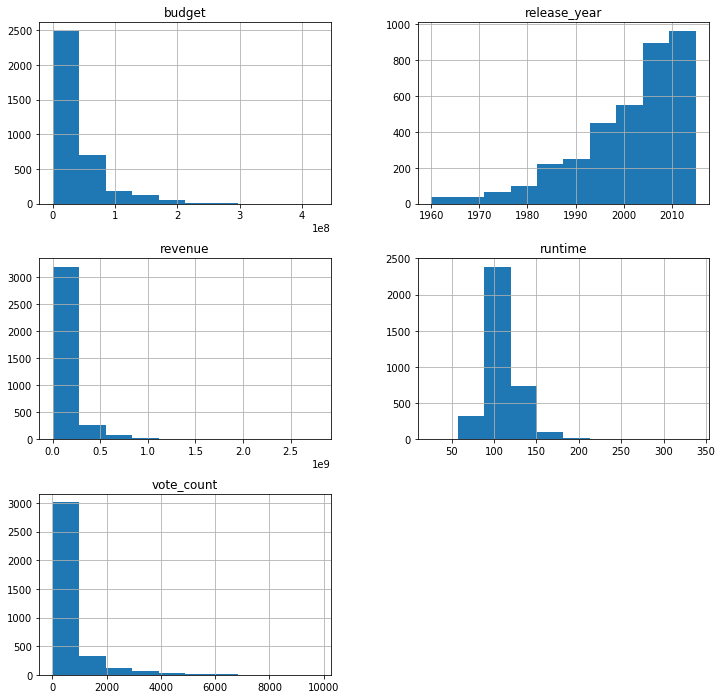

In [92]:
# drow histogram to our columns in dataset 
tmdb_data.hist(figsize = (12,12));

In [93]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
tmdb_data.insert(2,'profit_earned',tmdb_data['revenue']-tmdb_data['budget'])

#previewing the changes in the dataset
tmdb_data.head()


,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,release_date,vote_count,release_year,genres
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,2015-06-09,5562,2015,Action
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,2015-05-13,6185,2015,Action
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,2015-03-18,2480,2015,Adventure
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,2015-12-15,5292,2015,Action
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,2015-04-01,2947,2015,Action


Research Question  : Movies which had most and least profit_earned


In [94]:
# showing the max profit_earned
tmdb_data['profit_earned'].max()

2544505847

In [95]:
# showing the min profit_earned
tmdb_data['profit_earned'].min()

-413912431

In [96]:
# to get record with high profit_earned
tmdb_data[tmdb_data['profit_earned'] == 2544505847]

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,release_date,vote_count,release_year,genres
1386,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162,2009-12-10,8458,2009,Action


In [97]:
# to get record with least profit_earned
tmdb_data[tmdb_data['profit_earned'] == -413912431]

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,release_date,vote_count,release_year,genres
2244,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,100,2010-12-02,74,2010,Adventure


Research Question: Movies with longest and shortest runtime


In [98]:
# showing the max runtime
tmdb_data['runtime'].max()

338

In [99]:
# showing the min runtime
tmdb_data['runtime'].min() 

26

In [100]:
# to get record with high runtime
tmdb_data[tmdb_data['runtime'] == 338]

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,release_date,vote_count,release_year,genres
2107,18000000,871279,-17128721,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,The man who hijacked the world,338,2010-05-19,35,2010,Crime


In [101]:
# to get record with least runtime
tmdb_data[tmdb_data['runtime'] == 26]

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,release_date,vote_count,release_year,genres
8005,3000000,21000000,18000000,Mickey's Christmas Carol,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...,Burny Mattinson,He's back! Mickey Mouse - in his first new mot...,26,1983-10-19,89,1983,Family


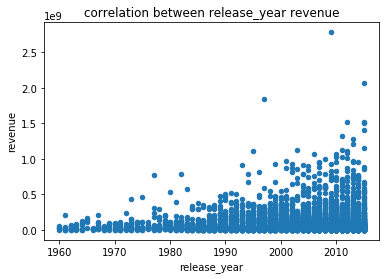

In [102]:
# to see correlation between release_year and revenue
tmdb_data.plot(x = 'release_year' , y = 'revenue' , kind = 'scatter' , title = 'correlation between release_year revenue');


* in 1960 to 1970 we can say its smallest revenue..
* in 2010 to 2015 we can say its largest revenue..

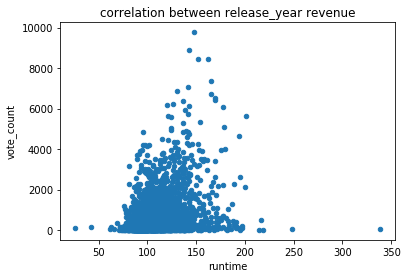

In [103]:
# to see correlation between runtime and vote_count
tmdb_data.plot(x = 'runtime' , y = 'vote_count' , kind = 'scatter' , title = 'correlation between release_year revenue');

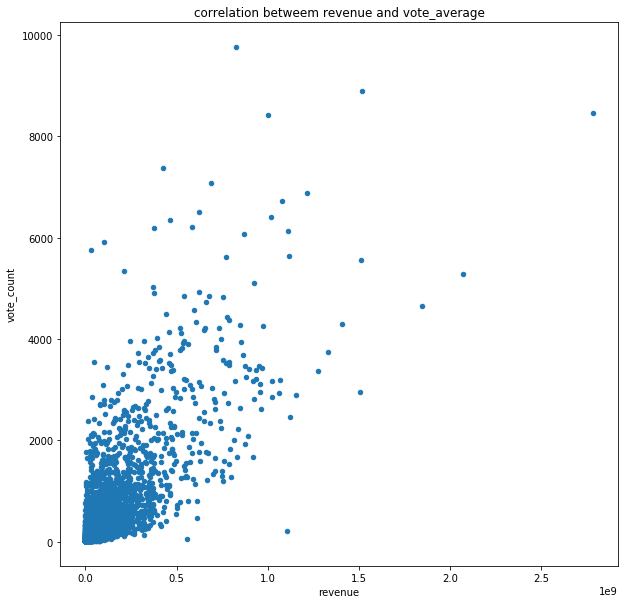

In [104]:
# correlation betweem revenue and vote_count
tmdb_data.plot(x = 'revenue' , y = 'vote_count' , kind = 'scatter' , figsize = (10,10) , title = 'correlation betweem revenue and vote_average');

Research Question: Succesful Genres

In [105]:
#selecting the movies having profit $50M or more
profit_data = tmdb_data[tmdb_data['profit_earned'] >= 60000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,release_date,vote_count,release_year,genres
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,2015-06-09,5562,2015,Action
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,2015-05-13,6185,2015,Action
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,2015-03-18,2480,2015,Adventure


In [106]:
#counting the no.of rows in the new data base
len(profit_data)

1179

In [107]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [108]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Action       235
Comedy       228
Drama        197
Adventure    153
Horror        68
dtype: int64

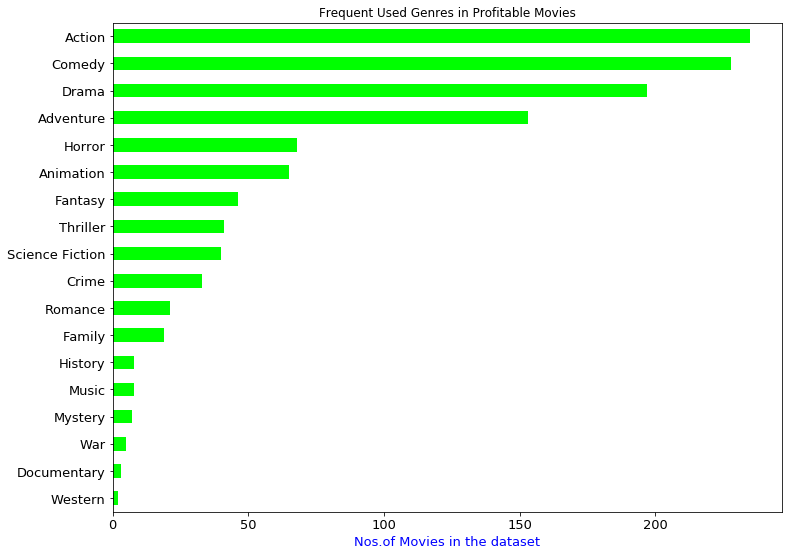

In [109]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'blue', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

Research Question: Average runtime of the movies

In [114]:
# defining a function to find average of a column
def avg_fun(column):
    return tmdb_data[column].mean()

In [115]:
#calling above function
avg_fun('runtime')


109.12290033594626

Research Question: Most Frequent Cast


In [112]:
#variable to store the retured value
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise            26
Tom Hanks             22
Brad Pitt             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

As expecteted Tom Cruise is on the top with total 26 cast followed by Brad Pitt with 22 and Tom Hanks with 22.

Conclusions

 1.Average runtime must be around 109 minutes.  

 2.most profit_earned was 2544505847 its Action movie and named 'Avatar'

 3.maximum runtime was 338  its crime and named 'carlos' 
 
 4.Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks,     Sylvester Stallone,Cameron Diaz

5.Genre must be : Action, Adventure,Horror , Comedy, Drama.

6.Most movie genres in the data set is Drama.

7.Least movie genres in the dataset is Foreign.

8.From 1960 to 1970, it's the smallest revenue.

9.From 2010 to 2015, it's the highest revenue.

Limitations

In Dataset there's alot of values with zeros and it make visualization sometimes not clear.


In [116]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0